##### Chapter 2: End-to-End Machine Leagning Project

## Setup

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import os
import tarfile
import urllib

This will fetch the data using urllib and tar

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
# run function and fetch data
fetch_housing_data()

This will load the data using pandas

In [8]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Exploring the data

In [41]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# check what type of categorical attributes are in "ocean_proximity"
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
# summary of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


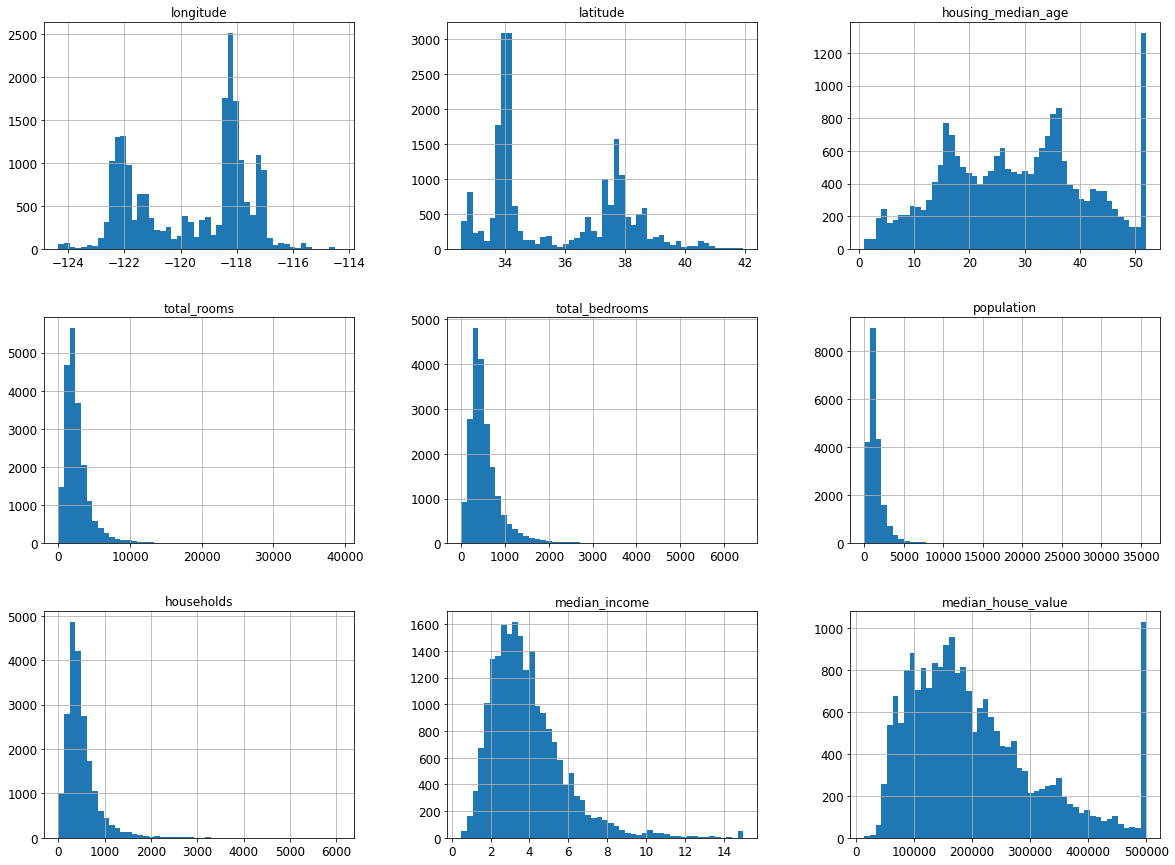

In [15]:
## matplotlib inline only in a Jupyter notebook
%matplotlib inline  

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Note:**
- 1. `median income` attribute does not look like it is expressed in US dollars. In fact it has been scaled and capped at 15.0001 for higher median incomes, and at 0.4999 for lower median incomes. The number represent roughly tens of thousands of dollars
- 2. `median age` and `median house value` were also capped. The latter may be a serious problem since is the label of the data we are trying to predict. We will look at these situations later

## Create a test set
Pick some instances randomly, around 20% of the dataset and set them aside

In [ ]:
import numpy as np


def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]



In [31]:
train_set, test_set = split_train_test(housing, 0.2)
print(f"Length train set: {len(train_set)}\nLength test set: {len(test_set)}")

Length train set: 16512
Length test set: 4128


This works, but it has a major problem. If the program is executed again, the test and training sets will generate a different test set. If ran enough times, the Machine Learning algorithm will get to see the whole dataset, invalidating the results.

Setting the random seed like `np.random.seed(42)` (42 or any number really) or saving the test set the first time the program is ran will break the next time you fetch and updated data set. 

**A possible solution** involves computing a hash of each instance's identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value.

In [44]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


**Note about last function** `test_set_check`

The `crc32` function outputs an unsigned 32-bit number, and the code tests if the CRC value is lower than the test_ratio times the maximum 32-bit number.

The `& 0xffffffff` mask is there only to ensure compatibility with Python 2 and 3. In Python 2 the same function could return a signed integer, in a range from -(2^31) to (2^31) - 1, masking this with the `0xffffffff` mask normalises the value to a signed.

So basically, either version turns the identifier into an integer, and the hash is used to make that integer reasonably uniformly distributed in a range; for the MD5 hash that's the last byte making the value fall between 0 and 255, for the CRC32 checksum the value lies between 0 and (2^32)-1. This integer is then compared to the full range; if it falls below the `test_ratio * maximum` cut-off point it is considered selected.

You could also use a random function, but then you'd get a different subset of your input each time you picked a sample; by hashing the identifier you get to produce a consistent subset. The difference between the two methods is that they'll produce a different subset, so you could use both together to pick multiple, independent subsets from the same input.

[Source in StackOverflow](https://stackoverflow.com/questions/50646890/how-does-the-crc32-function-work-when-using-sampling-data)

In [45]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Unfortunately, the housing dataset does not have an identifier column. The _simplest_ solution is to use the row index as the `ID`

In [46]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

An easy way to do the above is by using Scikit-Learn, which provides a few functions to split datasets into multiple subsets in various ways.

The simplest function is `train_test_split()`, which does pretty much the same as the function `split_train_set()`. It also allows the usage of a `random_state` parameter to set the random generator seed.

Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (Useful is you have a separate DataFrame for labels)


In [49]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [50]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
